In [1]:
from KT_model import *
from SpecRep import SRM, getSww_from_a_model

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
a_simu_instance = SRM(wu=100, N1=1024, fs=50, duration=8)

In [4]:
# Take a look at the shape
print("the shape of the w axis:", a_simu_instance.w_axis_4simu.shape)
print("the shape of the time axis:", a_simu_instance.t_axis_4simu.shape)

the shape of the w axis: (1024,)
the shape of the time axis: (400,)


In [5]:
a_simu_instance.t_axis_4simu.shape[0]

400

#### step-by-step implementation 

In [ ]:
a_KT_spectrum = KT_based_model.parameterized_KT_model(w_axis)

In [ ]:
type(a_KT_spectrum)

In [ ]:
plt.plot(w_axis, a_KT_spectrum)
plt.title('base KT model')
plt.show()

In [ ]:
gt = KT_based_model.Envelop_tfunc(t_axis)
gt2 = gt**2

In [ ]:
plt.plot(t_axis, gt)
plt.title('Envelop function')
plt.show()

In [ ]:

# create a separable S(w,t)

S_matrix = np.outer(a_KT_spectrum, gt2)

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = plt.axes(projection='3d')
# X, Y = np.meshgrid(w_axis, t)
# Z = S_matrix
ax.plot_surface(w_axis[:, None], t_axis[None, :], S_matrix)
ax.view_init(20, 180)

#### Shortened implementation

Recall what we've done:
1. create the `w_axis` and `t_axis`;
2. create the separable spectrum;
3. generate simulations

In [6]:
Sww = getSww_from_a_model(parameterized_KT_model, a_simu_instance.w_axis_4simu)

In [7]:
Sww.shape

(1024,)

the lower limit of sampling frequency: 32
the length of the simulation (400,)


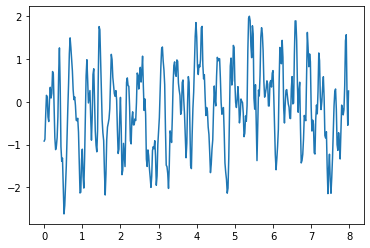

In [8]:
sta_KT_simulation_amp = a_simu_instance.SpecRepsentation(Sww, plot='y')

In [9]:
Swt_spectra = nonsta_model(a_simu_instance.w_axis_4simu, a_simu_instance.t_axis_4simu)

In [10]:
Swt_spectra.shape

(1024, 400)

the lower limit of sampling frequency: 32
the length of the simulation (400,)


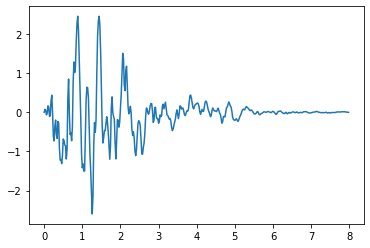

In [11]:
a_nonsta_simulation = a_simu_instance.SpecRepsentation(Swt_spectra, plot='y')